In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys


main_dir='drive/MyDrive/SER/'

data = pd.read_csv(main_dir+'../ravdes/featureEMOVO.csv')

#data = pd.read_csv('../ravdes/featureEMOVO.csv')

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,gender,labels
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7


In [ ]:
data.shape

(588, 195)

In [ ]:
#df=data.loc[data.iloc[:,-2] == 1] #female
df=data.loc[data.iloc[:,-2] == 2] #male

In [ ]:
#data.iloc[:,-2] == 1 #female
data.iloc[:,-2] == 2 #male

0      False
1      False
2      False
3      False
4      False
       ...  
583     True
584     True
585     True
586     True
587     True
Name: gender, Length: 588, dtype: bool

In [ ]:
X=df.iloc[:,:-2].copy()
y=df.iloc[:,-1].copy()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,13.788023,16.202099,16.689351,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,14.467161,15.449994,17.459077,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,14.419935,16.330941,18.172192,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,13.489356,16.934286,15.906022,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993
298,-319.776733,82.874512,-2.986594,41.945034,-8.119583,26.139738,0.383493,3.180753,-3.732891,11.955462,...,13.730269,16.036330,17.712544,34.708427,-0.009257,-0.019991,0.067884,-0.045997,0.002260,0.011251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [ ]:
#y=y-1
y

294    1
295    1
296    1
297    1
298    1
      ..
583    7
584    7
585    7
586    7
587    7
Name: labels, Length: 294, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,13.788023,16.202099,16.689351,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,14.467161,15.449994,17.459077,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,14.419935,16.330941,18.172192,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,13.489356,16.934286,15.906022,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993
298,-319.776733,82.874512,-2.986594,41.945034,-8.119583,26.139738,0.383493,3.180753,-3.732891,11.955462,...,13.730269,16.036330,17.712544,34.708427,-0.009257,-0.019991,0.067884,-0.045997,0.002260,0.011251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [ ]:
X.shape, y

((294, 193),
 294    1
 295    1
 296    1
 297    1
 298    1
       ..
 583    7
 584    7
 585    7
 586    7
 587    7
 Name: labels, Length: 294, dtype: int64)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [ ]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X.shape, y1.shape

((294, 193), (294, 7))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,13.788023,16.202099,16.689351,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,14.467161,15.449994,17.459077,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,14.419935,16.330941,18.172192,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,13.489356,16.934286,15.906022,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993
298,-319.776733,82.874512,-2.986594,41.945034,-8.119583,26.139738,0.383493,3.180753,-3.732891,11.955462,...,13.730269,16.036330,17.712544,34.708427,-0.009257,-0.019991,0.067884,-0.045997,0.002260,0.011251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [ ]:
#########fisher score

<AxesSubplot:>

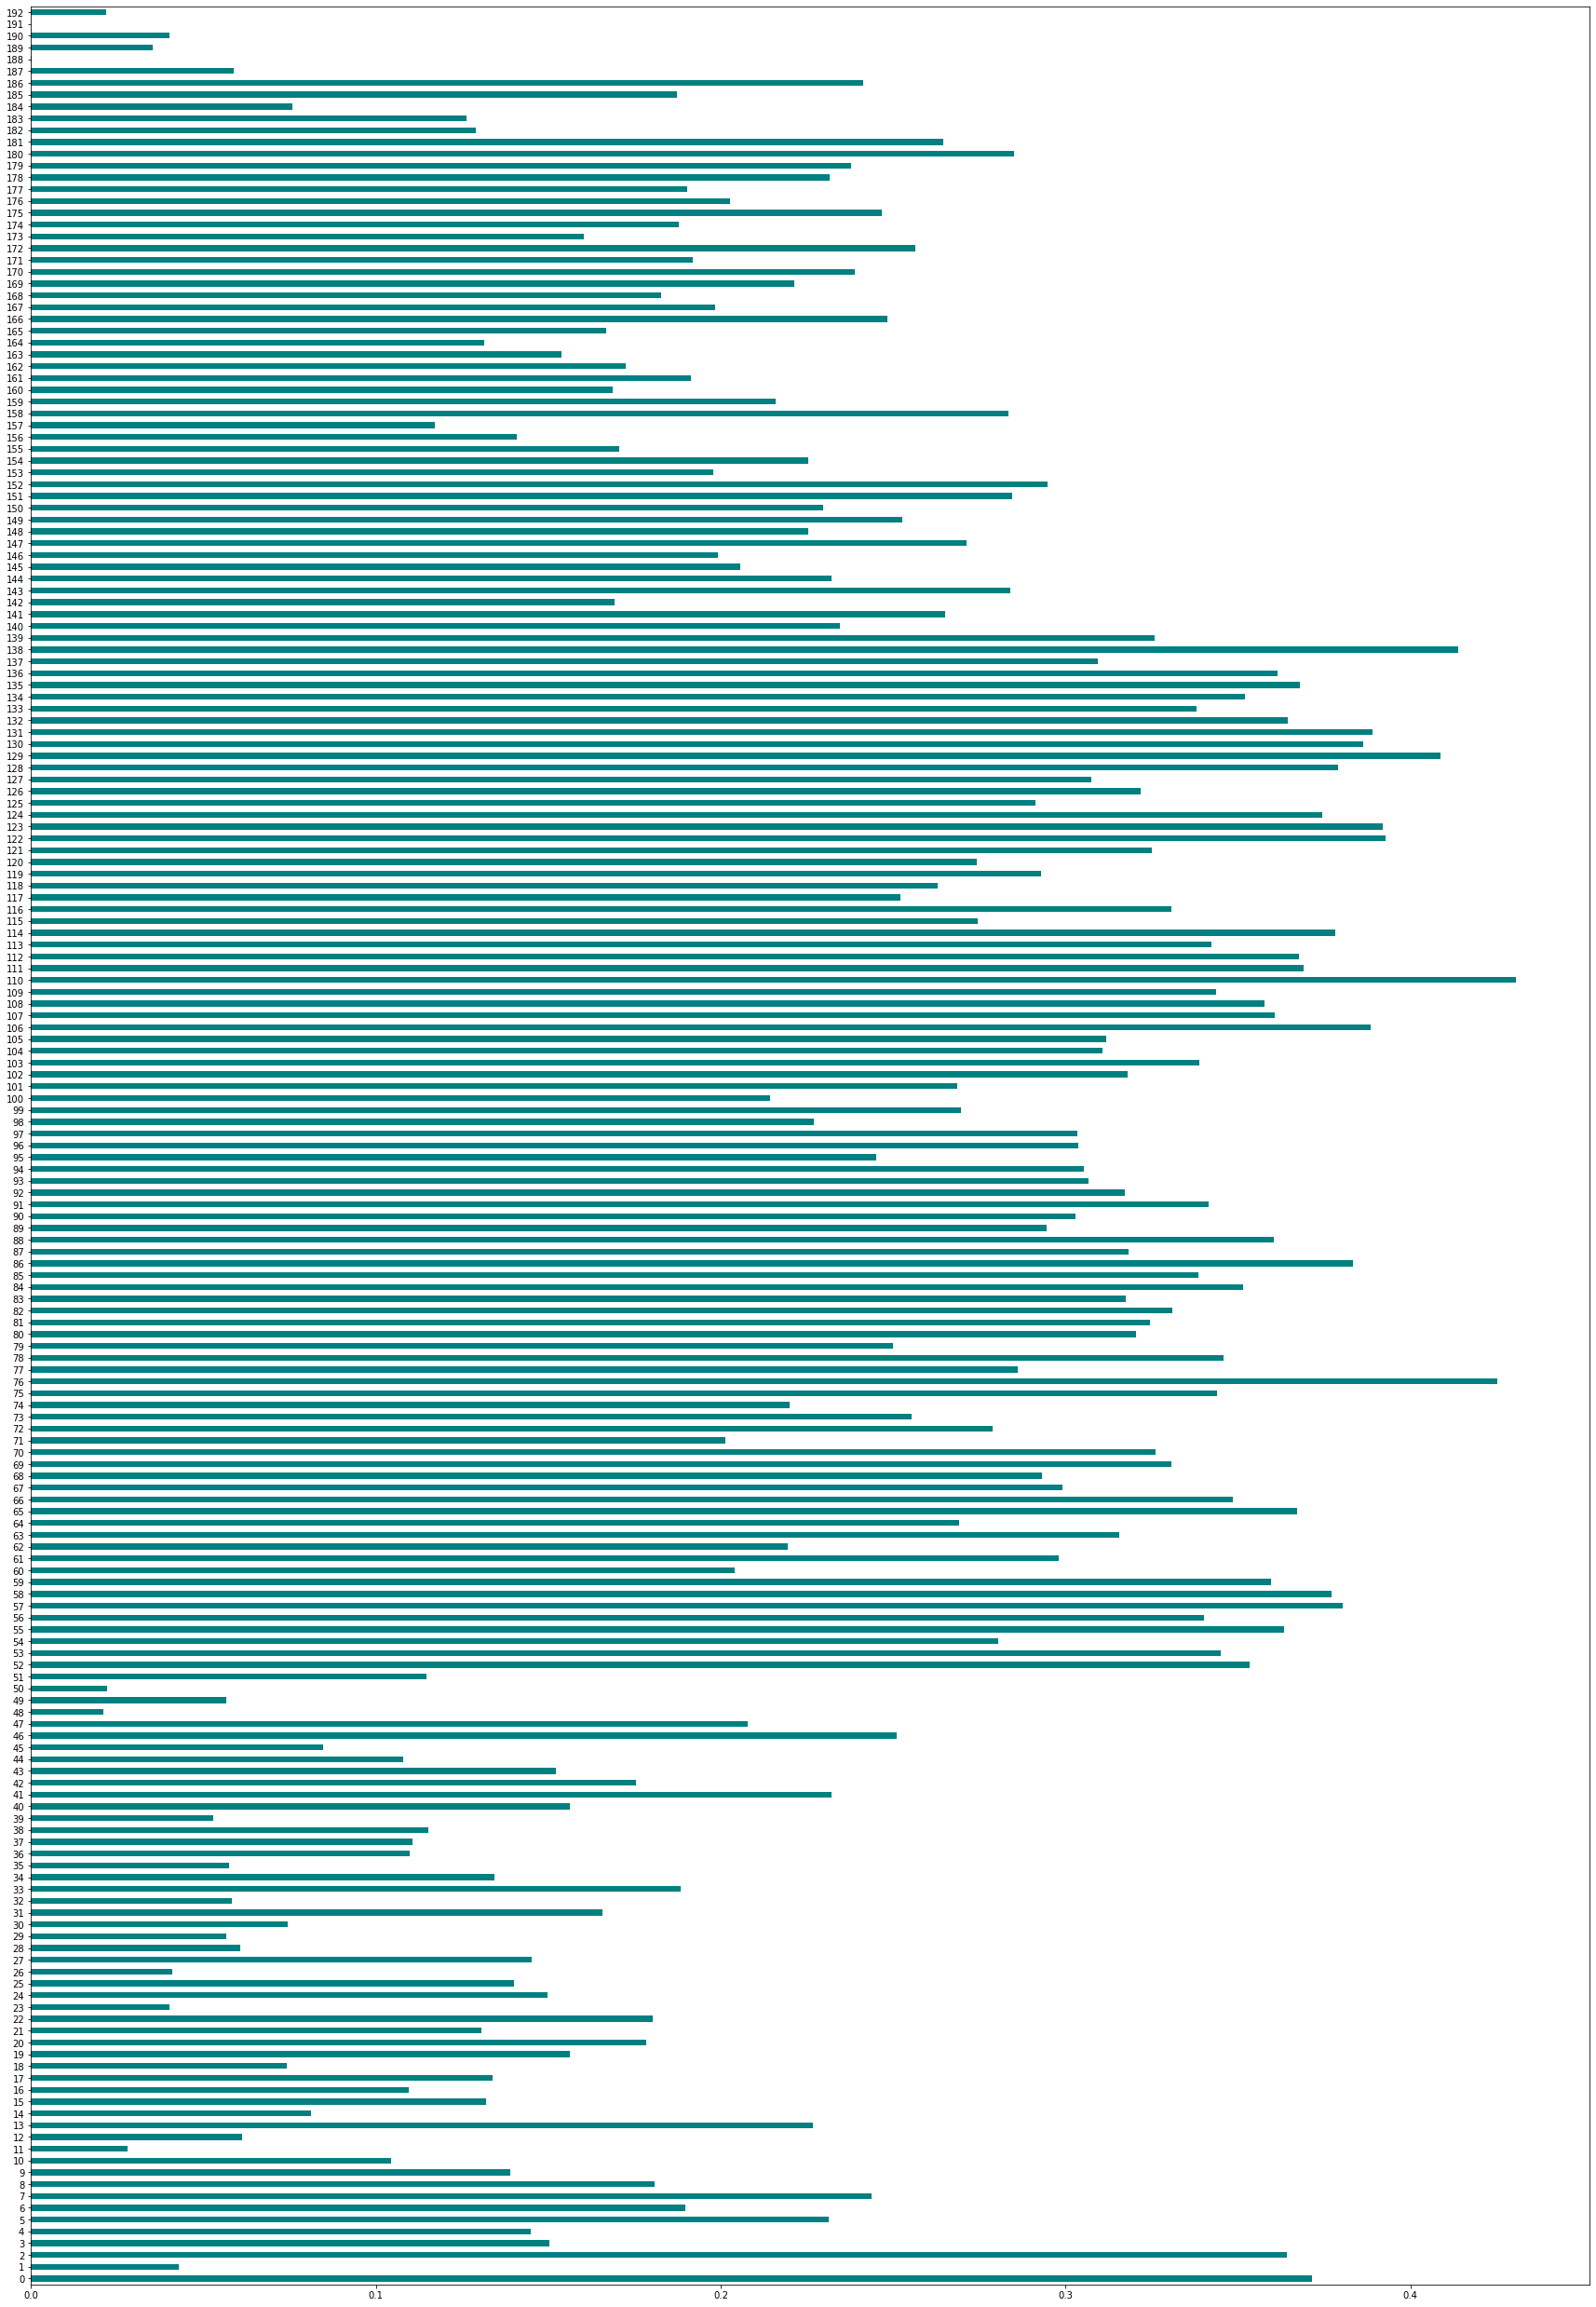

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, data.columns[0: len(data.columns)-2])
feat_importance.plot(kind='barh', color='teal', figsize=(30,45))

In [ ]:
feat_importance

0      0.371471
1      0.042776
2      0.364057
3      0.150361
4      0.144949
         ...   
188    0.000275
189    0.035305
190    0.040042
191    0.000000
192    0.021811
Length: 193, dtype: float64

In [ ]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [ ]:
from skfeature.function.similarity_based import fisher_score
fisherindex = fisher_score.fisher_score(X2, y2, mode='index')

In [ ]:
num_fea=145
fisherindex[0:num_fea].sort()

In [ ]:
fisherindex[0:num_fea]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  30,  32,  34,
        36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 160,
       161, 164], dtype=int64)

In [ ]:
selected_features = X2[:,fisherindex[0:num_fea]]

In [ ]:
selected_features, len(selected_features), selected_features[2]

(array([[-2.25834305e+02,  8.39624329e+01, -5.28681660e+00, ...,
          8.34223181e-02,  9.79835242e-02,  1.72996163e-01],
        [-2.48242477e+02,  8.82566986e+01,  2.07791662e+00, ...,
          6.89770952e-02,  4.71807607e-02,  1.26461223e-01],
        [-2.88580505e+02,  1.13707069e+02, -4.20791912e+00, ...,
          4.38222475e-03,  4.94396081e-03,  5.37043158e-03],
        ...,
        [-4.58537323e+02,  1.04085503e+02,  1.50521212e+01, ...,
          2.12087156e-03,  2.51636119e-03,  8.42314970e-04],
        [-5.23336914e+02,  8.80562668e+01,  1.88310604e+01, ...,
          1.60994008e-03,  1.20035384e-03,  9.11249139e-04],
        [-5.24293213e+02,  9.62651749e+01,  2.51278019e+01, ...,
          3.04794958e-04,  1.85740369e-04,  2.84311740e-04]]),
 294,
 array([-2.88580505e+02,  1.13707069e+02, -4.20791912e+00,  3.66426048e+01,
        -7.94863176e+00,  9.70913124e+00, -5.47053480e+00,  5.54342699e+00,
        -3.08587980e-02,  1.21377954e+01, -1.33983517e+01,  9.92646599e

In [ ]:
X3=pd.DataFrame(selected_features)
X3

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,0.127435,0.072797,0.043376,0.027011,0.023372,0.019360,0.032334,0.083422,0.097984,0.172996
1,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,0.243354,0.210068,0.198429,0.346777,0.238408,0.301076,0.194347,0.068977,0.047181,0.126461
2,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,0.008091,0.017096,0.018803,0.010455,0.006377,0.006907,0.005567,0.004382,0.004944,0.005370
3,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,0.188388,0.162250,0.107785,0.046126,0.066091,0.090162,0.097636,0.029167,0.028155,0.033268
4,-319.776733,82.874512,-2.986594,41.945034,-8.119583,26.139738,0.383493,3.180753,-3.732891,11.955462,...,0.033808,0.028767,0.014443,0.015318,0.012572,0.011753,0.008836,0.005417,0.005815,0.009980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,0.001142,0.001311,0.001002,0.000647,0.000426,0.000305,0.000312,0.000325,0.000243,0.000187
290,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,0.005994,0.009169,0.005937,0.004012,0.005676,0.006656,0.006678,0.003437,0.003547,0.003166
291,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,0.001794,0.001778,0.001731,0.002194,0.002283,0.002919,0.001881,0.002121,0.002516,0.000842
292,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,0.002236,0.001745,0.001232,0.001029,0.001197,0.001243,0.001245,0.001610,0.001200,0.000911


In [ ]:
X.iloc[:,12:21]

,12,13,14,15,16,17,18,19,20
294,-7.709405,4.997187,-12.688819,10.401689,-14.436471,7.681635,-8.060942,-2.396210,-4.983228
295,-15.679510,6.972369,-11.036031,6.869895,-11.297530,5.368743,-7.327658,-0.775389,-6.286399
296,-10.880679,7.653761,-8.835340,6.710871,-7.535480,3.206185,-8.481112,-2.151136,-4.815578
297,-14.009028,7.722689,-4.127521,7.034722,-14.514952,7.760721,-9.669089,-2.357195,-4.373134
298,-12.808709,9.501032,-5.735294,7.937979,-9.052581,4.607368,-4.388809,-2.341650,-3.197261
...,...,...,...,...,...,...,...,...,...
583,-7.715452,3.237248,-3.776451,10.553607,-14.090204,3.864971,-8.294493,3.767489,-11.432865
584,-9.094355,6.175828,-2.512284,8.345844,-10.664910,2.851817,-4.849615,0.569315,-10.165609
585,-9.407602,5.188097,1.050465,10.917832,-13.483180,5.652985,-8.611215,2.778719,-11.429992
586,-10.332073,6.340552,0.817571,6.459240,-10.217181,4.656199,-1.577644,1.560837,-7.032167


In [ ]:
############# İkinci fisher, yapma..

In [ ]:
#########

In [ ]:
### import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [ ]:
import random, numpy as np
from tensorflow.keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [ ]:

hist=[]
scores=[]
totalsize=290 #X3.shape[0]
a=create_index(kfold,totalsize)
for i in range (kfold):
    #print(a[i])

    model_name = 'Malemodel'+str(i)
    savedir='EMOVOMale_75/'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]

    x_traincnn =np.expand_dims(X_train, axis=2)
    x_testcnn= np.expand_dims(X_test, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)
    hist.append(m1.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test)))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))


    #outfile = TemporaryFile()
    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)


0
Epoch 1/700
4/4 [==============================] - 2s 175ms/step - loss: 2.4102 - accuracy: 0.1207 - val_loss: 1.9698 - val_accuracy: 0.1207
Epoch 2/700
4/4 [==============================] - 0s 86ms/step - loss: 2.2209 - accuracy: 0.1466 - val_loss: 1.9606 - val_accuracy: 0.1379
Epoch 3/700
4/4 [==============================] - 0s 85ms/step - loss: 2.1452 - accuracy: 0.2026 - val_loss: 1.9535 - val_accuracy: 0.1379
Epoch 4/700
4/4 [==============================] - 0s 85ms/step - loss: 2.0160 - accuracy: 0.2328 - val_loss: 1.9416 - val_accuracy: 0.1207
Epoch 5/700
4/4 [==============================] - 0s 86ms/step - loss: 1.9549 - accuracy: 0.2241 - val_loss: 1.9372 - val_accuracy: 0.1034
Epoch 6/700
4/4 [==============================] - 0s 85ms/step - loss: 1.9713 - accuracy: 0.2500 - val_loss: 1.9349 - val_accuracy: 0.1207
Epoch 7/700
4/4 [==============================] - 0s 86ms/step - loss: 1.8935 - accuracy: 0.2543 - val_loss: 1.9286 - val_accuracy: 0.1379
Epoch 8/700
4/4 [

In [ ]:
x_testcnn.shape, y_test.shape

((58, 145, 1), (58, 7))

In [ ]:
### scores

In [ ]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

4.1724138259887695 0.8344827651977539


In [ ]:
scores

[[0.8832467198371887, 0.8275862336158752],
 [0.8320040106773376, 0.8103448152542114],
 [0.7920244336128235, 0.8448275923728943],
 [0.7907297015190125, 0.8620689511299133],
 [0.8296781182289124, 0.8275862336158752]]

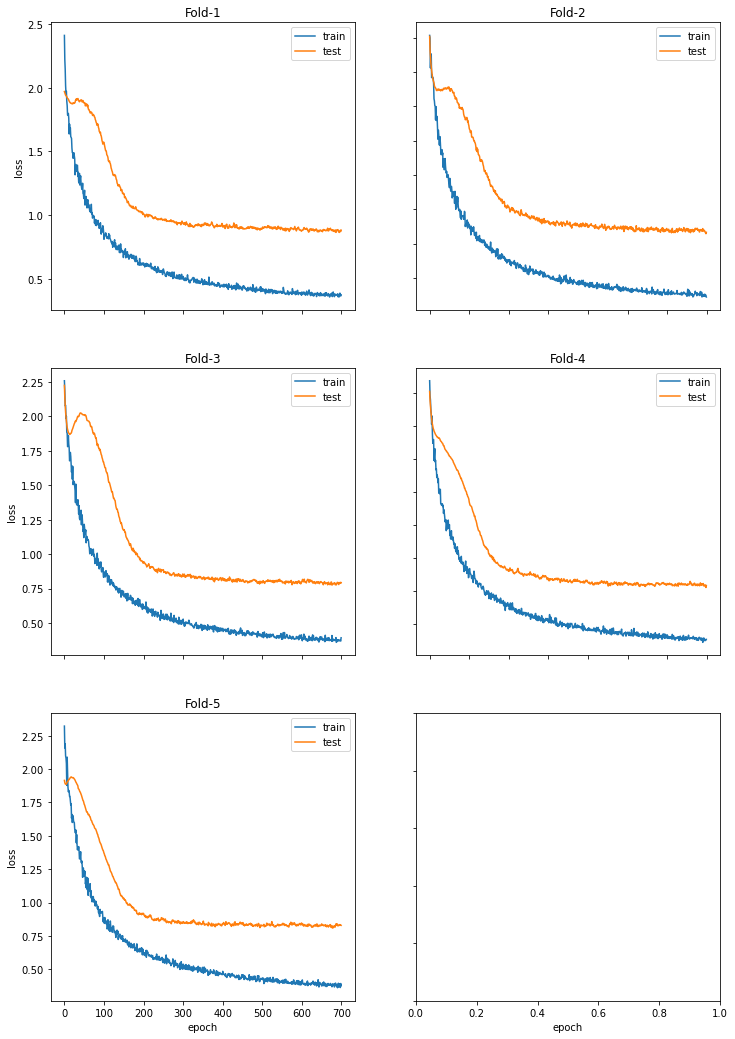

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'test'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'test'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'test'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'test'], loc='upper right')

axs[2, 0].plot(hist[4].history['loss'])
axs[2, 0].plot(hist[4].history['val_loss'])
axs[2, 0].set_title('Fold-5')
axs[2, 0].legend(['train', 'test'], loc='upper right')

#axs[2, 1].plot(hist[0].history['loss'])
#axs[2, 1].plot(hist[0].history['val_loss'])
#axs[2, 1].set_title('model loss')
#axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('EMOVOMale_5Folds.png')

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 87.5   0.    0.    0.    0.    0.   12.5]
 [  0.   50.    0.    0.    0.   50.    0. ]
 [  0.    0.  100.    0.    0.    0.    0. ]
 [ 12.5   0.    0.   62.5   0.    0.   25. ]
 [  0.    0.    0.    0.  100.    0.    0. ]
 [ 10.    0.    0.    0.    0.   90.    0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


      dis   gio    neu   pau    rab   sor    tri
dis  87.5   0.0    0.0   0.0    0.0   0.0   12.5
gio   0.0  50.0    0.0   0.0    0.0  50.0    0.0
neu   0.0   0.0  100.0   0.0    0.0   0.0    0.0
pau  12.5   0.0    0.0  62.5    0.0   0.0   25.0
rab   0.0   0.0    0.0   0.0  100.0   0.0    0.0
sor  10.0   0.0    0.0   0.0    0.0  90.0    0.0
tri   0.0   0.0    0.0   0.0    0.0   0.0  100.0



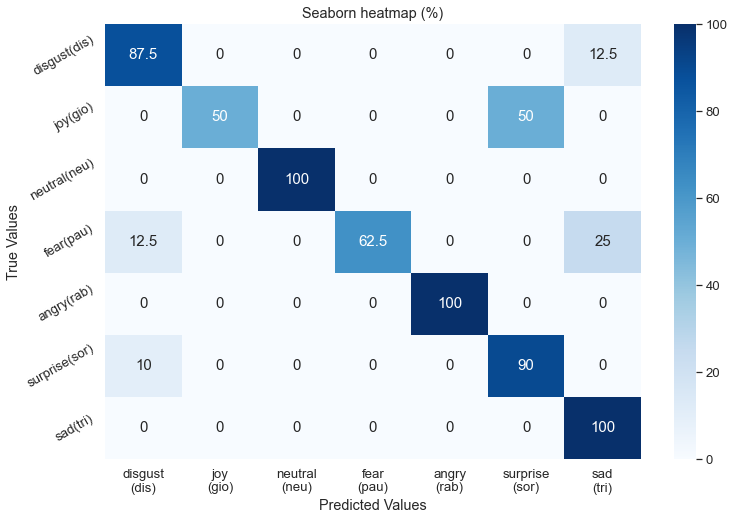

In [ ]:
## EMOVO emotions : ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

listik = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Blues", fmt='g', annot_kws={"size": 15},)
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(['disgust(dis)', 'joy(gio)', 'neutral(neu)','fear(pau)', 'angry(rab)', 'surprise(sor)', 'sad(tri)'],rotation=30)

aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EMOVOMale_65.png')
plt.show()